<a href="https://colab.research.google.com/github/raulsomazabracho/Clusterization/blob/main/Clasificacion_Hongos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este codigo puede clasificar hongos por venenosos y no venenosos basandose en sus caracteristicas

# IMPORTAMOS PRIMERAS LIBRERIAS

In [ ]:
#Para obtener acceso a archivos del google drive
from google.colab import drive
drive.mount('/content/drive/')
#Librerias basicas de ciencia de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive/


# LECTURA DEL DATASET

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Data Science/Python/Clusterizaciones (Supervisadas)/Hongos (Comparando varios modelos)/mushrooms.csv')
print(df.info)
df.head(5)

<bound method DataFrame.info of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Observamos los nulos por atributo
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#obersvamos categorias de la variable target
df['class'].unique()

array(['p', 'e'], dtype=object)

Tenemos entonces 2 clasificaciones = edible---> comestible,poisonous--->toxico

# TRANSFORMACION DEL DATASET

## Convertir los strings unicos en enteros

In [ ]:
#Importamos la libreria
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Tranformamos las columnas
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
#Revisamos los labels en una oclumna de ejemlplo
print(df['stalk-root'].unique())

[3 2 1 4 0]


In [ ]:
#VEMOS CUAL ES LA DISTRIBUCION DE LOS GRUPOS
print(df.groupby('class').size())

class
0    4208
1    3916
dtype: int64


Hay 4208 registros comestibles y 3916 toxicos

## Distribucion de la data con respecto al target

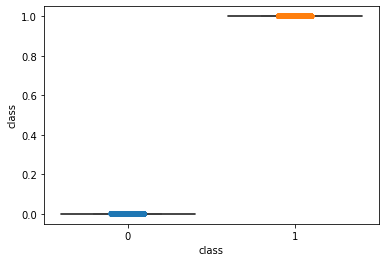

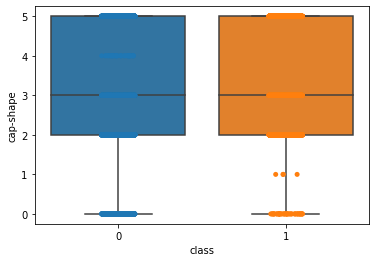

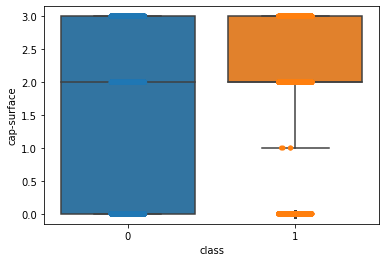

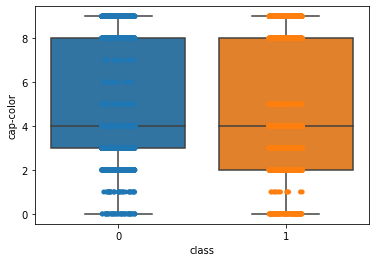

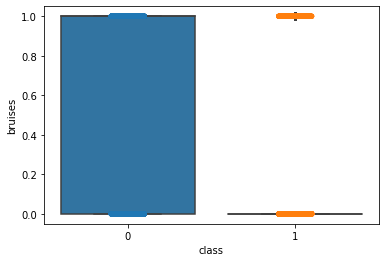

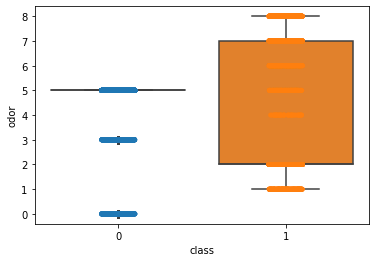

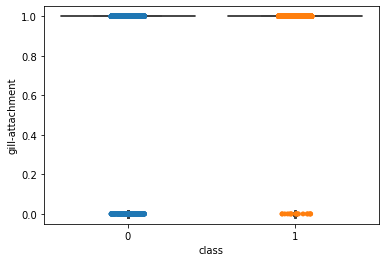

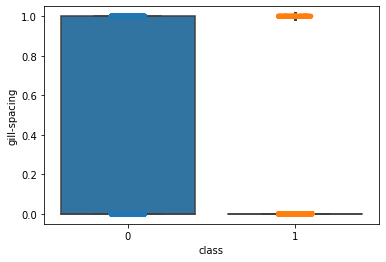

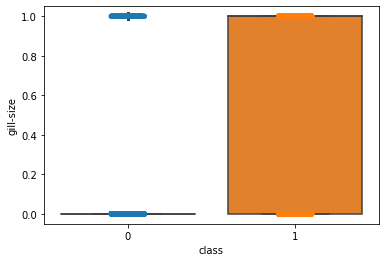

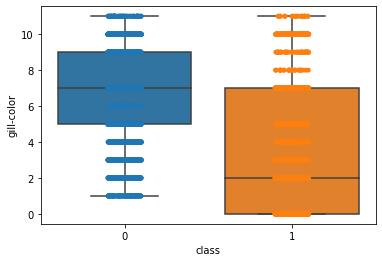

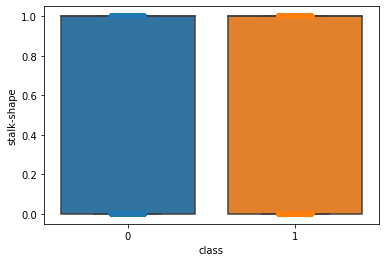

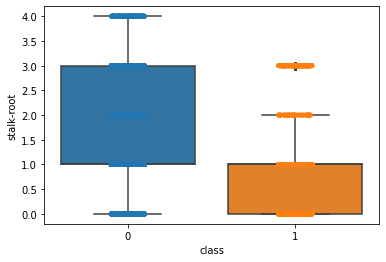

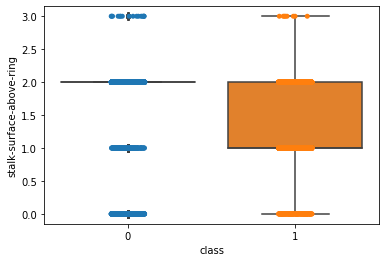

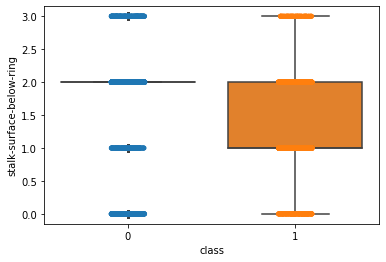

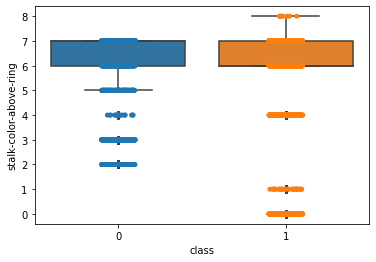

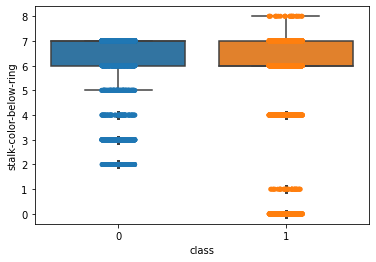

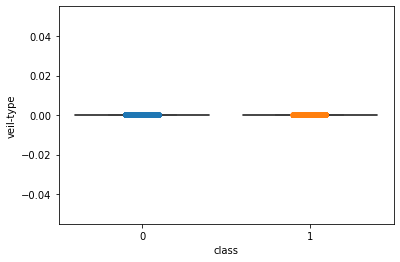

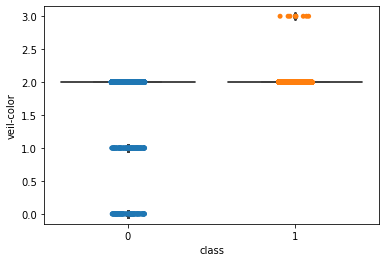

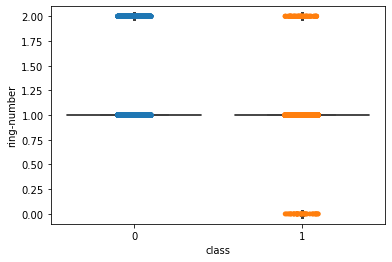

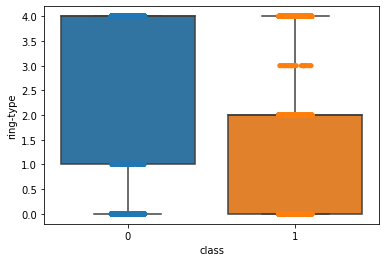

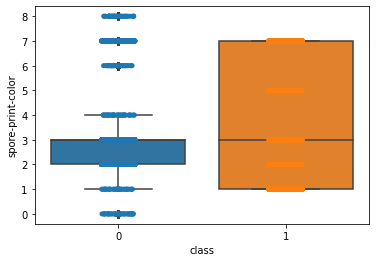

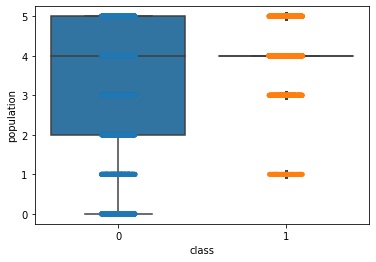

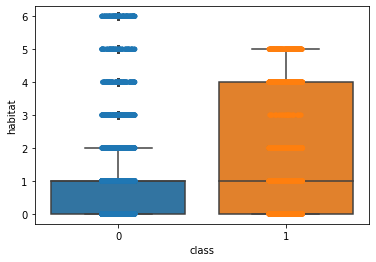

In [ ]:
#Hacemos un boxplot
for col in df.columns:
  ax = sns.boxplot(x = 'class',y =col, data = df)
  ax = sns.stripplot(x = 'class',y =col, data = df, jitter =True, edgecolor = 'gray')
  plt.show()


## Separamos features de target

In [ ]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [ ]:
print(x.head())

   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3
3          5            3          8  ...                  2           3        5
4          5            2          3  ...                  3           0        1

[5 rows x 22 columns]


In [ ]:
x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Observamos correlacion de las variables

In [ ]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Estandarizamos la data

In [ ]:
#importamos libreria
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

## PRINCIPAL COMPONENT ANALYSIS (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

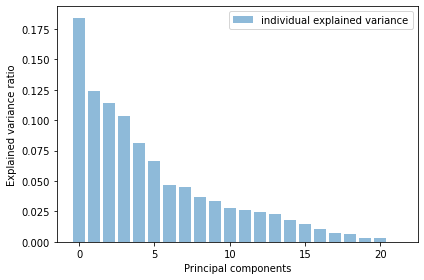

In [ ]:
#El explained varianca ratio nos explica cuanto influye cada feature en la explicacoin de la varianza del modelo
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
    
plt.bar(range(22), explained_variance_ratio, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
print(explained_variance_ratio)

[1.84458684e-01 1.23955899e-01 1.14306801e-01 1.03165737e-01
 8.10867705e-02 6.64182876e-02 4.66039611e-02 4.53247460e-02
 3.66638866e-02 3.38886068e-02 2.74993066e-02 2.58294323e-02
 2.42651684e-02 2.27216831e-02 1.83057085e-02 1.48185678e-02
 1.04106068e-02 7.59501185e-03 6.26216657e-03 3.48525415e-03
 2.93371356e-03 3.76432098e-35]


In [ ]:
#Vemos la suma acumulada de componentes principales para ver si filtramos algun
np.cumsum(explained_variance_ratio)

array([0.18445868, 0.30841458, 0.42272138, 0.52588712, 0.60697389,
       0.67339218, 0.71999614, 0.76532089, 0.80198477, 0.83587338,
       0.86337269, 0.88920212, 0.91346729, 0.93618897, 0.95449468,
       0.96931325, 0.97972385, 0.98731887, 0.99358103, 0.99706629,
       1.        , 1.        ])

In [ ]:
# se crea la lista de componentes para pasar al modelo 
lista_componentes = ["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17","pc18","pc19","pc20","pc21","pc22"]

In [ ]:
#se crea el dataframe con las componentes principales
df_pca = pd.DataFrame(pca.fit_transform(X),columns =lista_componentes)

In [ ]:
#si quisieramos optimizar el modelo se pueden filtrar aca algunas commponentes (por ejemplo las que sumen el 80% de la varianza)
df_pca_80 = df_pca[[]]

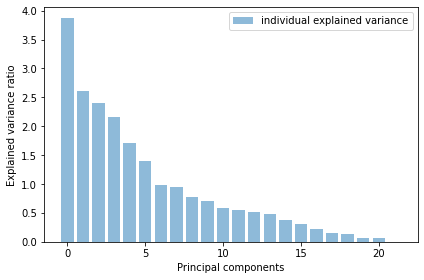

In [ ]:
#El explained varianca ratio nos explica cuanto influye cada feature en la explicacoin de la varianza del modelo
explained_variance = pca.explained_variance_

plt.figure(figsize=(6, 4))
    
plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Hay unos 4 features que tienen muy poca varianza

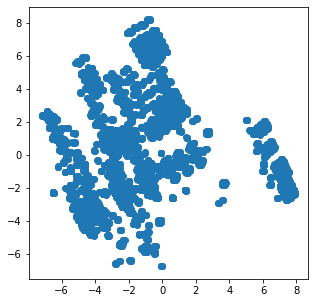

In [ ]:
#Hacemos knn means con los 2 componen principales
N = df.values
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(N)
plt.figure(figsize =(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.show()


In [ ]:
# se pueden observar 2 grupos, los coloreamos
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,random_state = 4)
x_clustered = kmeans.fit_predict(N)
LABEL_COLOR_MAP = {0:'g',1:'r'}
label_color = [LABEL_COLOR_MAP[l]for l in x_clustered]
plt.figure (figsize = (5,5))
plt.scatter(x_clustered[:,0],x_clustered[:,1],c = label_color)

IndexError: ignored

<Figure size 360x360 with 0 Axes>

## PCA CON 17 FEATURES

In [ ]:
pca_modificada = PCA(n_components = 17)
x_pca_trans = pca_modificada.fit_transform(X)
plt.figure(figsize =(5,5))
plt.scatter(x_pca_trans[:,0],x_pca_trans[:,1])
plt.show()

# DIVIDIMOS EN TRAIN_TEST

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)


# MODELOS DE MACHINE LEARNING

## Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [ ]:
model_LR.fit(x_train,y_train)

LogisticRegression()

### Evaluacion del Modelo

In [ ]:
#imprimimos matriz de confusion de la regresion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = model_LR.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,811,31
verdaderamente venenoso,29,754


#### ROC/AUC

In [ ]:
#Evaluamos el performance
auc_roc=metrics.roc_auc_score(y_test,y_predic)
print(auc_roc)

0.9630729304125978


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9630729304125978

Text(0.5, 0, 'False Positive Rate')

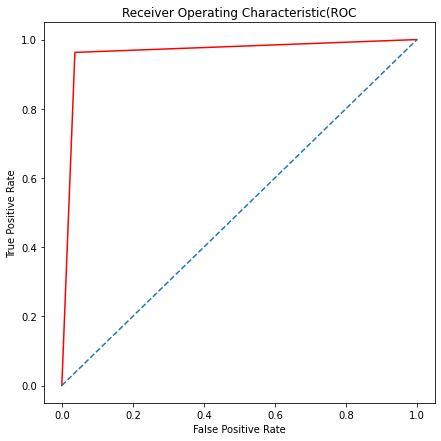

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

Logistica: f1=0.962 auc=0.971


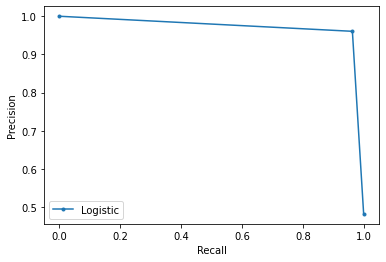

In [ ]:
#importamos las librerias
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#sacamos las metricas
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# sumamos los scores e imprimimos
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# graficamos el prc
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Regresión Logistica Tuneada

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model = LogisticRegression()

In [ ]:
parametros = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

LR = GridSearchCV(LR_model,parametros, cv = 5)
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Mejor combinacion de parametros",LR.best_params_)

Mejor combinacion de parametros {'C': 100, 'penalty': 'l2'}


### Evaluamos al modelo

In [ ]:
#imprimimos matriz de confusion de la regresion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = LR.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,813,29
verdaderamente venenoso,16,767


Se ve que haciendo hiperparametros mejoramos en 2 los predecidos normales y en 13 los predecidos venesosos, un monton

#### ROC/AUC

In [ ]:
#Evaluamos el performance
auc_roc=metrics.roc_auc_score(y_test,y_predic)
print(auc_roc)

0.9725619837217839


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9725619837217839

Text(0.5, 0, 'False Positive Rate')

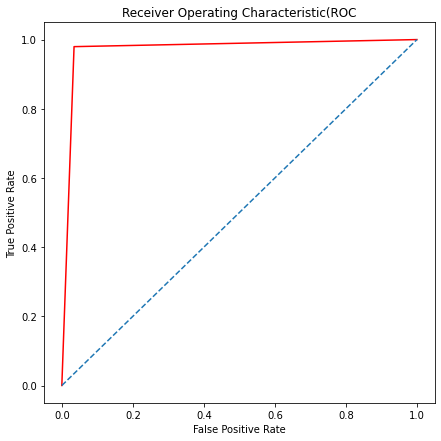

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#importamos las librerias
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [ ]:
#sacamos las metricas
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# sumamos los scores e imprimimos
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=0.972 auc=0.976


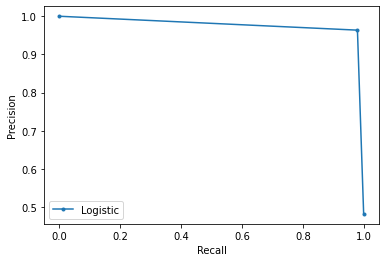

In [ ]:
# graficamos el prc
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Desicion Tree

In [ ]:
#Importamos el modelo
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

In [ ]:
#Entrenamos
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#imprimimos matriz de confusion de la regresion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = dt.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


[Text(145.56521739130434, 203.85, 'X[8] <= -0.37\ngini = 0.499\nsamples = 6499\nvalue = [3366, 3133]'),
 Text(72.78260869565217, 176.67000000000002, 'X[20] <= -0.115\ngini = 0.284\nsamples = 2654\nvalue = [455, 2199]'),
 Text(29.11304347826087, 149.49, 'X[19] <= -0.88\ngini = 0.212\nsamples = 481\nvalue = [423, 58]'),
 Text(14.556521739130435, 122.31, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(43.66956521739131, 122.31, 'X[7] <= 0.413\ngini = 0.066\nsamples = 438\nvalue = [423, 15]'),
 Text(29.11304347826087, 95.13, 'gini = 0.0\nsamples = 423\nvalue = [423, 0]'),
 Text(58.22608695652174, 95.13, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(116.45217391304348, 149.49, 'X[10] <= 0.839\ngini = 0.029\nsamples = 2173\nvalue = [32, 2141]'),
 Text(101.89565217391305, 122.31, 'X[12] <= -1.633\ngini = 0.009\nsamples = 2151\nvalue = [10, 2141]'),
 Text(87.33913043478262, 95.13, 'X[4] <= -0.307\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(72.78260869565217, 67.94999999999

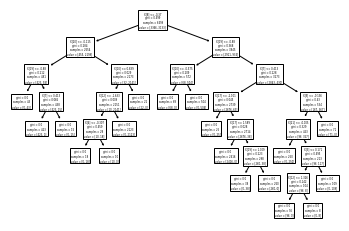

In [ ]:
#Imprimimos el arbol de desicion
tree.plot_tree(dt)

### Evaluamos el modelo

#### ROC/AUC

## KNN Means

In [ ]:
#Importamos libreria y creamos el objeto
from sklearn.cluster import  KMeans
knn_model =  KMeans(n_clusters = 2)

In [ ]:
#Entrenamos al modelo
knn_model.fit(x_train,y_train)

KMeans(n_clusters=2)

In [ ]:
#imprimimos matriz de confusion de la regresion
from sklearn.metrics import confusion_matrix
#predecimos 
y_predic = knn_model.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,6,836
verdaderamente venenoso,365,418


### Evaluamos el modelo

### Evaluamos el modelo

#### ROC/AUC

In [ ]:
#AUC
from sklearn.metrics import roc_auc_score

auc_roc = metrics.roc_auc_score(y_predic,y_test)
print(auc_roc)

0.17475292003593887


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.27048503987647243

Text(0.5, 0, 'False Positive Rate')

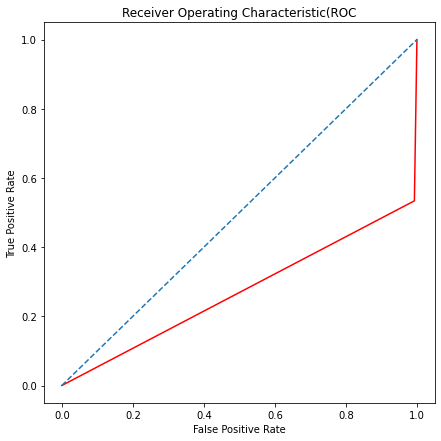

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(7,7))
plt.title("Receiver Operating Characteristic(ROC")
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### PRC

In [ ]:
#importamos las librerias
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [ ]:
#sacamos las metricas
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_predic)
lr_f1, lr_auc = f1_score(y_test, y_predic), auc(lr_recall, lr_precision)
# sumamos los scores e imprimimos
print('Logistica: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistica: f1=0.410 auc=0.546


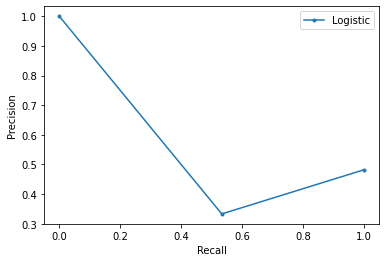

In [ ]:
# graficamos el prc
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest

In [ ]:
#Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 45)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=45)

In [ ]:
from sklearn.metrics import confusion_matrix
#predecimos
y_predic= rf.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,y_predic), columns = ['Predecido Normal', 'Predecido venenoso'], index = ['Verdaderamente normal', 'verdaderamente venenoso'])

,Predecido Normal,Predecido venenoso
Verdaderamente normal,842,0
verdaderamente venenoso,0,783


In [ ]:
#Observamos cual es el feature que mas pesa en la toma de desiciones
feature_scores = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_scores)

odor                        0.252228
gill-size                   0.124467
gill-color                  0.124120
population                  0.109461
ring-type                   0.098462
bruises                     0.083338
stalk-root                  0.056962
stalk-surface-below-ring    0.029791
stalk-shape                 0.027401
stalk-color-below-ring      0.019511
spore-print-color           0.016975
habitat                     0.011380
ring-number                 0.010903
stalk-surface-above-ring    0.010406
cap-color                   0.009796
cap-shape                   0.005114
gill-spacing                0.003946
stalk-color-above-ring      0.003211
veil-color                  0.002513
cap-surface                 0.000015
veil-type                   0.000000
gill-attachment             0.000000
dtype: float64


Veamos cual feature tiene mas peso en la desición y  se observa que el que mas afecta la desición es el olor del hongo

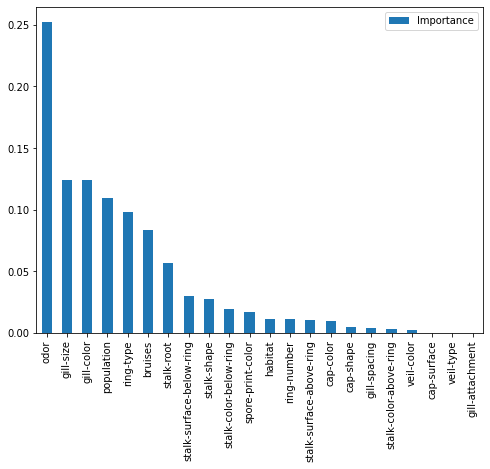

In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, x.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))